In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('conditions.csv', parse_dates=['STOP'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,42.228354,-72.562951,271227.08,1334.88,2001-05-01,NaT,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,42.228354,-72.562951,271227.08,1334.88,2011-12-08,2011-12-22,1d604da9-9a81-4ba9-80c2-de3375d59b40,792fae81-a007-44b0-8221-46953737b089,444814009,Viral sinusitis (disorder)
2,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,42.228354,-72.562951,271227.08,1334.88,2019-03-20,2019-04-10,1d604da9-9a81-4ba9-80c2-de3375d59b40,4e595f0c-f50f-461b-a04e-13b4e492350e,444814009,Viral sinusitis (disorder)
3,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,42.360697,-71.126531,793946.01,3204.49,2016-12-29,2017-01-05,034e9e3b-2def-4559-bb2a-7850888ae060,3b639086-5fbc-4720-8c31-e8c8c0f1d660,10509002,Acute bronchitis (disorder)
4,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,42.181642,-72.608842,574111.90,2606.40,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)


In [3]:
dt_stop = df_al['STOP'].dropna()
dt_stop = dt_stop.unique()
dt_stop

array(['2011-12-22T00:00:00.000000000', '2019-04-10T00:00:00.000000000',
       '2017-01-05T00:00:00.000000000', ...,
       '1986-03-02T00:00:00.000000000', '2010-11-25T00:00:00.000000000',
       '2012-05-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
df_al['STOP'] = df_al['STOP'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['STOP'] = df_al['STOP'].replace({pd.NaT: "0"})
df_al['STOP']

0       0
1       1
2       1
3       1
4       1
       ..
8371    0
8372    0
8373    0
8374    1
8375    1
Name: STOP, Length: 8376, dtype: object

In [5]:
contigency = pd.crosstab(df_al['STOP'], df_al['DESCRIPTION'])
contigency

DESCRIPTION,Acute allergic reaction,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Alcoholism,Alzheimer's disease (disorder),Anemia (disorder),Antepartum eclampsia,Appendicitis,Atopic dermatitis,...,Smokes tobacco daily,Sprain of ankle,Sprain of wrist,Streptococcal sore throat (disorder),Stroke,Suspected lung cancer (situation),Tear of meniscus of knee,Tubal pregnancy,Viral sinusitis (disorder),Whiplash injury to neck
STOP,,,,,,,,,,,,,,,,,,,,,
1,19,68,562,650,0,0,24,26,0,4,...,0,132,56,156,0,0,6,4,1242,55
0,0,1,1,3,10,25,276,0,50,16,...,7,2,0,1,48,15,0,37,6,0


<AxesSubplot:xlabel='DESCRIPTION', ylabel='STOP'>

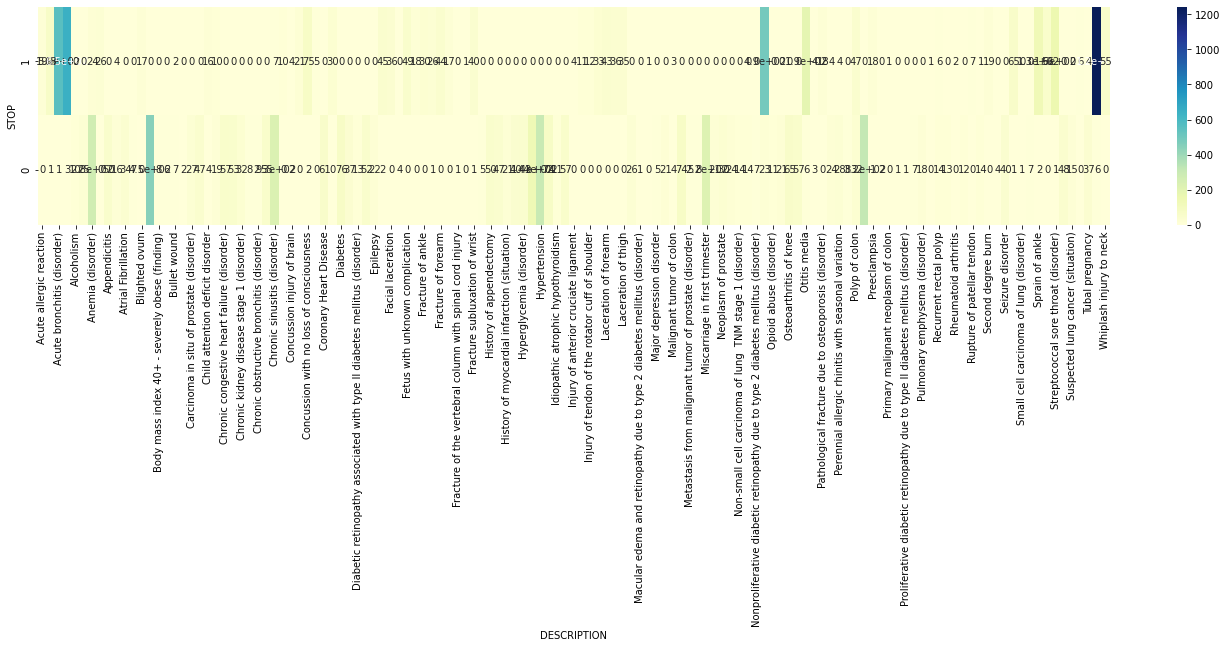

In [6]:
plt.figure(figsize=(24,4))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

0.0